#**CLIMATE-VIZ**

# **a Introducción**

El ejercicio consta de la creacion de gráficos de mapas y animaciones que muestren la variabilidad de la temperatura a lo largo de los años, con el fin de concientizar al público sobre los peligros y la gravedad del cambio climático.
Las visualizaciones se basan en el dataset GISTEMP v4 de la NASA que combina datos recolectados por estaciones meteorológicas y datos recolectados por estaciones de áreas oceánicas, lo que da como resultado un registro completo de la variabilidad climática para toda la superficie de nuestro planeta. El dataset incluye temperaturas desde 1880 – al presente en una frecuencia mensual, y es utilizado por la NASA para monitorear la variabilidad climática global y regional. En lugar de proporcionar temperaturas absolutas, se proporciona la anomalía en comparación con un período base (1951-1980).
Estos datos poseen un formato del tipo NetCDF es un formato de archivo que admite datos científicos orientados a matrices y se usa comúnmente en campos como la climatología y la meteorología. Como es de imaginarse, estos datos representan un gran volumen y por ello entrarian en dicha tematica.

---

# **b Armado del Ambiente**

A continuacion se indican todos los pasos previos requeridos para la realización del ejercicio.

1.1 Instalar la biblioteca "Cartopy" de Python que emplearemos para generar los gráficos con los datos geoespaciales.

In [ ]:
!pip install cython

!pip install cartopy

!pip uninstall shapely -y

!pip install shapely --no-binary shapely

     |████████████████████████████████| 10.8 MB 9.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 93 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 162 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 53.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516221 sha256=e921c4a9a89bd9a1e0f05d02e48efa2d59d1aaa15d16d8ed96c376f05f3103ec
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=c1f8f4b8e4440018de9d7279364b8353b816b8395bc847195f60202f3578346f
  Stored in directory: /root/.cache/p

Nota: en la instalación se procede a desinstalar shapely que se instala por defecto debido a que dicha libreria de geometría posee un error de Point o LineString usando Cartopy lo que generaba un cierre inesperado de la máquina virtual.

1.2 Ejecutar el siguiente comando para descargar el dataset GISTEMP v4 de la NASA en el cuaderno.

In [ ]:
!wget https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz

--2021-11-22 19:06:16--  https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24956906 (24M) [application/x-gzip]
Saving to: ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’

gistemp1200_GHCNv4_ 100%[===================>]  23.80M  3.08MB/s    in 8.5s    

2021-11-22 19:06:25 (2.80 MB/s) - ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’ saved [24956906/24956906]



De ejecutarse correctamente visualizaremos el archivo en el cuaderno.

1.3 Una vez descargado el dataset procedemos a importar las librerías necesarias y cargar el conjunto de datos GISTEMP al xarray, usando la función open_dataset ()

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr

xr_df = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz')
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, nv: 2, time: 1702)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2021-10-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2021-11-10 10:02:57 by SBBX_to_nc 2.0 - ILAND=1200,...

De cargarse correctamente el archivo, se imprimirá un conjunto de datos de la matriz sobre sus atributos y variables. El conjunto de datos se conforma como una cuadrícula de anomalías de temperatura de 2 ° × 2 °, con una frecuencia mensual

---
# **c Desarrollo**

Una vez realizados los pasos previos estamos listos para comenzar con el ejercicio. La idea es generar unos gráficos empleando por un lado las prestaciones de la librería Cartcopy en conjunto con los datos tomados del dataset GISTEMP v4 de la NASA. A continuación se detallan las herramientas a emplear:


> **Xarray**

> Librería inspirada en la popular librería Pandas, que extiende gran parte de su funcionalidad a matrices multidimensionales. La librería está construida sobre NumPy, lo que facilita su integración en un workflow de aprendizaje automático de Python. Xarray introduce etiquetas en forma de dimensiones, coordenadas y atributos sobre matrices sin procesar similares, lo que permite una experiencia de desarrollo más intuitiva, más concisa y menos propensa a errores. Además, también tiene grandes capacidades de trazado para la visualización de conjuntos de datos científicos, para este ejercicio en particular, la librería admite el formato NetCDF el cual es un formato de uso recurrente en archivo de datos científicos orientados a matrices y se usa comúnmente en campos como la climatología y la meteorología, por lo que emplear esta librería resulta muy provechoso para trabajar con el dataset GISTEMP v4.

>  **Cartopy**

> Cartopy es una librería de Python utilizada para la visualización de datos geoespaciales que permite a los científicos crear mapas con calidad de publicación. Si bien existen varias librerías para tratar datos geoespaciales, Cartopy se caracteriza por dibujar mapas para que el análisis y la visualización de datos sea lo más intuitivo posible además de que, para este ejercicio en particular, se integra bien con la librería xarray.

> **Matplotlib**

> Matplotlib es una librería de trazado 2D que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas. matplotlib se puede utilizar en scripts de python, el shell de python e ipython, servidores de aplicaciones web, etc. Permite crear y personalizar los tipos de gráficos más comunes, entre ellos: Diagramas de barras, Histograma, Diagramas de sectores, Diagramas de caja, Diagramas de violín, Diagramas de dispersión o puntos, Diagramas de líneas, Diagramas de áreas, Diagramas de contorno, Mapas de color y combinaciones de todos ellos. Por lo general el procedimiento para emplear esta librería es definir la figura que contendrá el gráfico, que es la región (ventana o página) donde se dibujará y los ejes sobre los que se dibujarán los datos. Para ello se utiliza la función subplots(). Luego Dibujar los datos sobre los ejes, para ello se utilizan distintas funciones dependiendo del tipo de gráfico que se quiera. Para personalizar el gráfico, existen multitud de funciones que permiten añadir un título, una leyenda, una rejilla, cambiar colores o personalizar los ejes. Una vez configurado el grafico a nuestro gusto el mismo se guarda con la función savefig(). Por ultimo para mostrar el gráfico se utiliza la función show().

















2.1 Primero, vamos a trazar un mapa global de la anomalía de temperatura para el año 2021. Debajo del código se indica una explicación de cada sentencia en detalle. Si ejecutamos la celda debajo y la misma finaliza sin errores, deberíamos de visualizar una imagen del mapa.

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


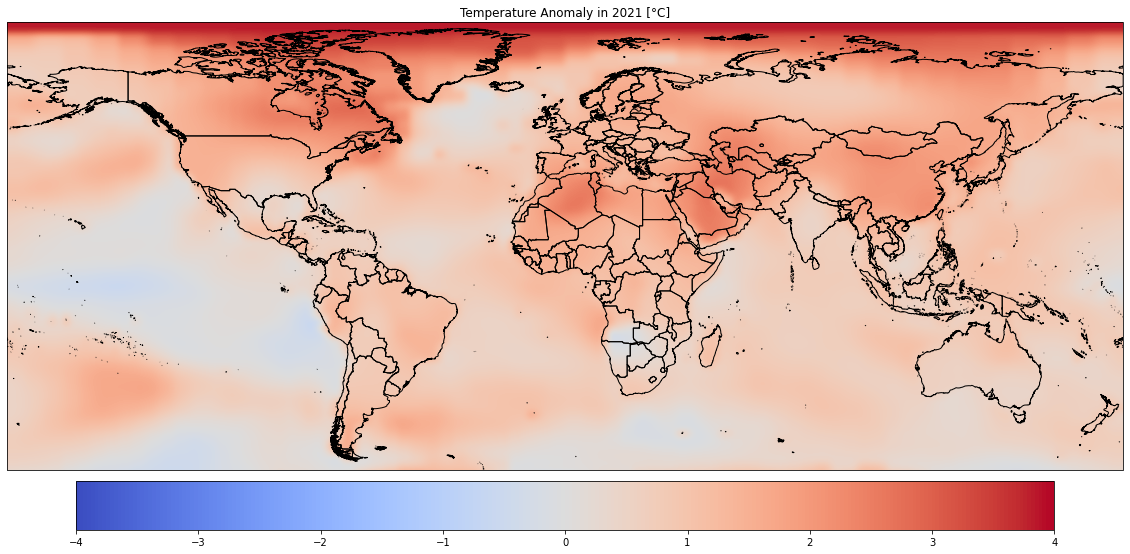

In [ ]:
#Reduce la resolución de la serie temporal a la frecuencia anual.
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

#Creación de una imagen estática como barra de referencia de la temperatura global para un año determinado.

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
plt.show()


A continuación se indica la explicación de las sentencias de código ejecutadas que hacen posible la representación de la imagen del mapa.

En primer lugar, volvemos a muestrear el conjunto de datos de la matriz a una frecuencia anual, ya que es más conveniente trabajar con él. Para ello empleamos la función resample() del objeto xarray, la cual devuelve un objeto Resample para realizar operaciones de re muestreo. La dimensión re muestreada debe ser una coordenada similar a una fecha y hora, por lo que le pasamos el valor 'Y', seguido de la función mean() para reducir el set de datos con la media aplicada. Del dataset solo nos quedamos con los valores indicados en la variable 'tempanomaly' en un xarray al que llamamos anomaly. 

Después de esto, creamos un mapa cartopy y agregamos los límites de todos los países del mundo. Con la palabra clave cbar_kwargs especificamos dibujado de la barra inferior del mapa. 

Empleamos la función figure() del objeto matplotlib para crear una figura con las dimensiones especificadas. 
Luego agregamos un conjunto de ejes mediante la interfaz de cartopy que permite la creación de mapas usando matplotlib. Crear un mapa básico es tan simple como decirle a matplotlib que use una proyección de mapa específica. Para este ejercicio se empleó la proyección PlateCarree(). Esto nos devuelve un objeto GeoAxes al que llamamos ax. Este objeto es el principal encargado de integrar cartopy con matplotlib, que es una subclase de un matplotlib Axes normal. La clase GeoAxes agrega feature adicional a un eje que es específico para dibujar mapas. Las features adicionales se agregan con la funcion add_feature (entiéndase feature como una colección de puntos, líneas y polígonos con métodos convenientes para operaciones comunes de dibujo y filtrado.). 
Para el ejercicio se está empleando la interfaz NaturalEarthFeature. Los parámetros que se están pasando a dicha función son:


* category = 'cultural' indica la categoría del conjunto de datos.
* name = admin_0_countries' indica el nombre del conjunto de datos.
* scale = '10m' indica la escala del conjunto de datos.
* facecolor = 'none' y edgecolor = 'black' y por último los argumentos clave que se utilizarán al dibujar.

Por otro lado la función ax.set_extent indica la posición del eje de coordenadas para posicionarnos en un punto específico del mapa global e indicar los delimitadores de la imagen, siendo cada parámetro: left=-150, right=150, bottom=-55, top=85.

En la siguiente instrucción lo que hacemos es recuperar del xarray anomaly el último elemento correspondiente al año 2021 mediante el método isel mediante un subíndice negativo (Esto es porque en phyton podemos usar subíndices negativos para recorrer un arreglo en sentido inverso) seguido del método values para acceder a los valores. Asu vez el valor devuelto lo parseamos a una estructura de dato del tipo fecha con el método de panda to_datetime.
Mediante set_title de nuestro objeto ax pasamos por parámetro una cadena la cual se dibujara en la parte superior de la imagen.

La instrucción que sigue accede nuevamente a la misma posición del xarray anomaly pero esta vez para mostrar los datos como una imagen con la función plot.imshow pasando como parámetros:


*   vmin=-4, vmax=4 que definen el rango de datos que cubre el mapa de colores.
*   el parametro map='coolwarm' definimos el mapa de colores el cual se seleccionó siguiendo por ser un mapa del tipo Divergente: mapa de colores con cambio en la luminosidad y posiblemente saturación de dos colores diferentes que se encuentran en el medio en un color insaturado; debe usarse cuando la información que se está trazando tiene un valor medio crítico. 
*   cbar_kwargs=cbar_kwargs indica el diccionario de argumentos de palabras clave para pasar a la barra de colores.
*   Interpolación='bicubic' define el método de interpolación utilizado. La imagen renderizada se produce normalmente con una profundidad de color superior a la de los monitores, que los tipos de archivo de bajo rango dinámico como JPEG, PNG y BMP pueden reproducir. La interpolación reduce los errores de cuantización. En cuanto a la interpolación bicúbica es un sistema 2D que utiliza splines cúbicos u otra técnica polinomial para enfocar y ampliar imágenes digitales. Es comúnmente utilizado en software de edición de imágenes por computadora, por retocadores y editores al mejorar o remuestrear una imagen. Cuando interpolamos una imagen, en realidad estamos distorsionando los píxeles de una cuadrícula a otra.

Finalmente, con la función plt.savefig guardamos la figura actual indicando:

* "global_map.png" Titulo de la figura.
* bbox_inches='tight' Cuadro delimitador en pulgadas: solo se guarda la parte dada de la figura. Al indicarse tight se ajusta al tamaño de la imagen. 
* dpi=150 Especifica la resolución en puntos por pulgada.

La ultima instrucción únicamente se encarga de imprimir por pantalla la figura guardada con la función plt.show().






2.2 Ahora vamos a cambiar nuestro enfoque a los países europeos, trazando el mapa de esa región.

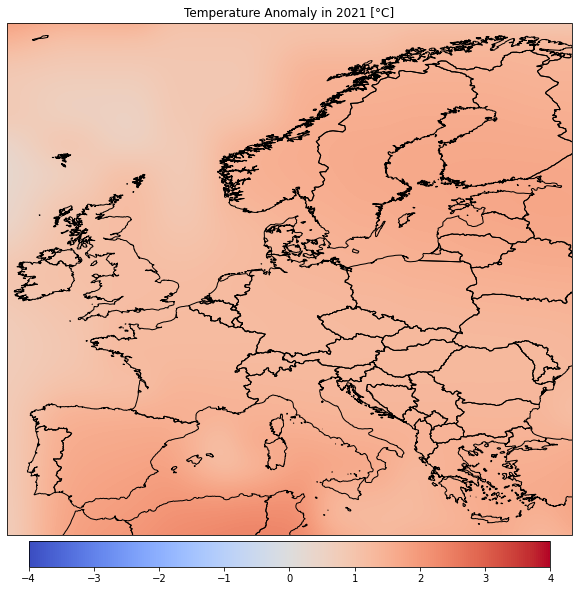

In [ ]:
#Creación de una imagen estática de la anomalía de la temperatura europea para un año determinado.

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
xr.plot.imshow(anomaly.isel(time=i), ax=ax, add_labels=False,
                   vmin=-4, vmax=4, cmap='coolwarm', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("european_map.png", bbox_inches='tight', dpi=150)
plt.show()

La principal diferencia con el código indicado anteriormente en 2.1 es la instrucción de la línea 14 donde se especifica la función set_extent del objeto GeoAxes cartopy que contiene unos valores que ahora permiten reajustar el enfoque para que se visualice específicamente el mapa en la región europea en lugar de todo el mapa.  



2.3 Para finalizar el ejercicio, creamos una animación con todo el historial de anomalías y la variabilidad de la temperatura en las últimas décadas para la misma región. Al igual que para el otro apartado de código, debajo se explica cada instancia.

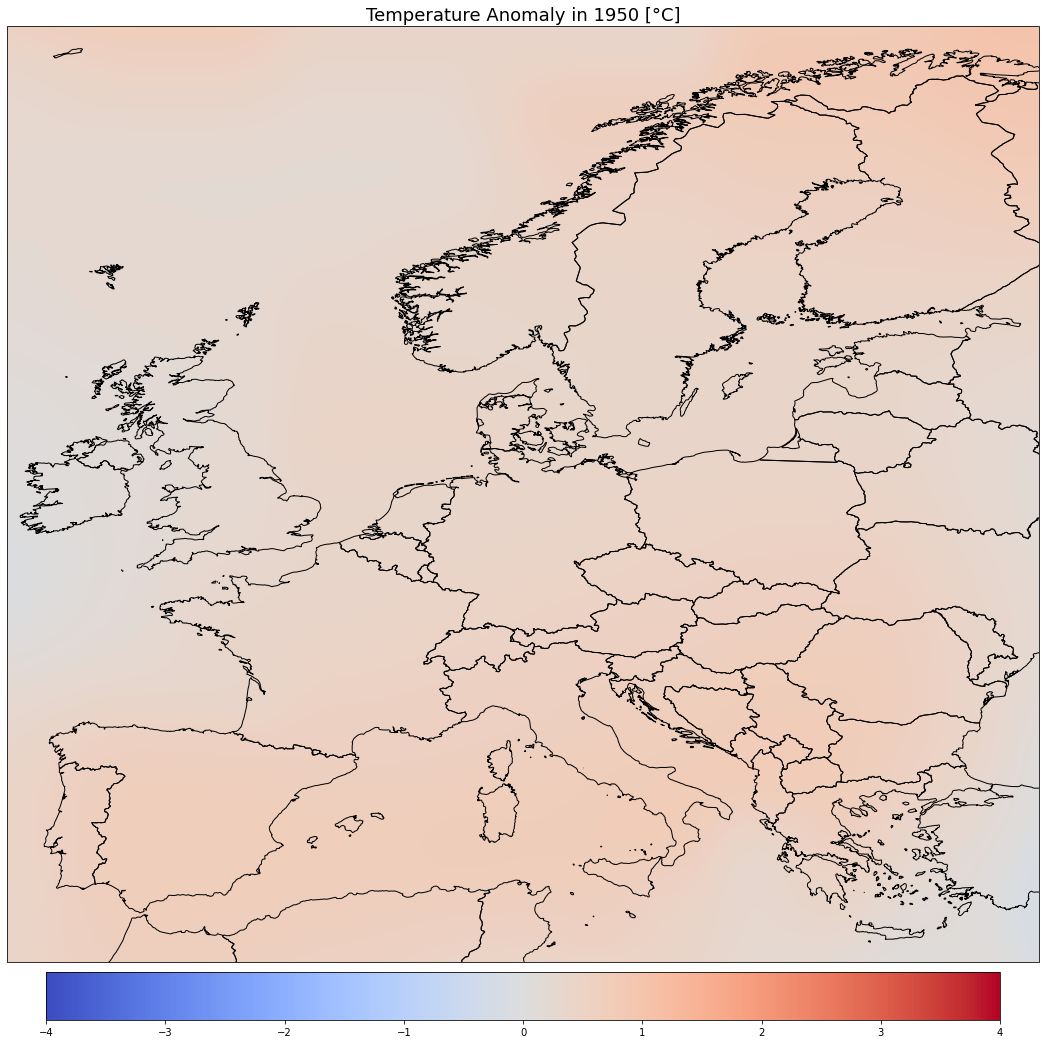

In [ ]:
#Crea una animación para 1950-2021 y guardarla como video MP4.

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96)
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

image = anomaly.isel(time=0).plot.imshow(ax=ax, add_labels=False,
                       vmin=-4, vmax=4, cmap='coolwarm', animated=True,
                       cbar_kwargs=cbar_kwargs, interpolation='bicubic')

def animate(t):
    date =  pd.to_datetime(anomaly.sel(time=t)['time'].values)
    ax.set_title("Temperature Anomaly in " + str(date.year) + " [°C]")
    ax.title.set_fontsize(18)
    image.set_array(anomaly.sel(time=t))
    return image

ani = FuncAnimation(fig, animate, frames=anomaly['time'].values[-72:], blit=False)
ani.save("animation.mp4", fps=2)

Las líneas iniciales ya fueron explicadas en la anterior sección 2.1 y 2.2. Por lo que se comenzara la explicación desde la línea 21 en adelante.

En la siguiente instrucción se define una función la que especifica cómo se generará cada fotograma de la animación. La misma recibe como parámetro los valores del xarray anomaly definidos en la variable time.
Dentro de la función en la primera instrucción empleamos la función de xarray sel con la que devuelve un DataArray cuyos datos se proporcionan seleccionando etiquetas de índice de la dimensión especificada, para este caso 'time'. A diferencia de a función usada anteriormente isel, los indexadores de este método deben usar etiquetas en lugar de números enteros. Posteriormente volvemos a usar el método values para recuperar los valores. Para indicar en el frame el título del año como venimos haciéndolo para el resto de los ejemplo usamos set_title y title.set_fontsize para darle formato. Por ultimo empleamos el metodo set_array para actualizar los valores de la imagen con los de la línea temporal que se pasó como argumento a la función animate.

En la instrucción de la línea 28 empleamos la función FuncAnimatio que permite hacer una animación llamando repetidamente a una función que se pasa por parámetro, adicionalmente se debe pasar:


* fig indica el objeto de figura utilizado para obtener los eventos necesarios, como dibujar o cambiar el tamaño
* animate indica la función a llamar en cada fotograma.
* frames=anomaly['time'].values[-72:] indica la fuente de datos para pasar a la función animate y cada fotograma de la animación.
* blit=False indica si se utiliza blitting para optimizar el dibujo.


Esta función devuelve un objeto del tipo animación el cual guardamos en la variable ani.

Por ultimo ejecutamos el método del objeto ani, save el cual guarda un archivo de video dibujando cada fotograma de la animación al que le indicamos los siguientes parámetros:

* animation.mp4 indica el nombre del archivo de salida
* fps=2 indica fotogramas por segundo en el video.






# **Conclusiones**

La creación de gráficos informativos y atractivos sobre el cambio climático es un proceso relativamente fácil con las librerías de phyton expuestas en el ejerció y que poseen un gran potencial de computo incluso para volúmenes de datos grandes y que no requiere de contar con mucha experiencia previa, tal vez, no más que un poco de conocimiento en programación general y las estructura de datos. Para el ejercicio empleamos datos de una fuente genuina como lo son los datos científicos proporcionados gratuitamente por organizaciones acreditadas como la NASA, lo que respalda de mayor veracidad el diagrama expuesto. También es de considerar el hecho que las herramientas empleadas son todas opensource permitiendo que cualquiera pueda hacer uso de las mismas y encontrar usos a la gran amalgama de datos que hoy día podemos recolectar de múltiples fuentes.

---

# **Bibliografía**

Toda referencia utilizada para confeccionar el ejercicio.

Libreria Matplotlib:
https://matplotlib.org/

Colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Libreria Xarray:
http://xarray.pydata.org/en/stable/

Libreria Cartopy:
https://scitools.org.uk/cartopy/docs/latest/

Codigo fuente: https://github.com/derevirn/climate-viz

Dataset GISTEMP: https://data.giss.nasa.gov/gistemp/